In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Libraries for Deep Learning APIs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
#Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
from google.colab import drive

In [3]:
gold_df = pd.read_csv("/content/drive/MyDrive/data/gold_dataset.csv")
gold_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [31]:
gold_df.shape

(1718, 80)

In [4]:
gold_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [5]:
gold_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [6]:
gold_df.drop('Date', axis=1, inplace=True)
gold_df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


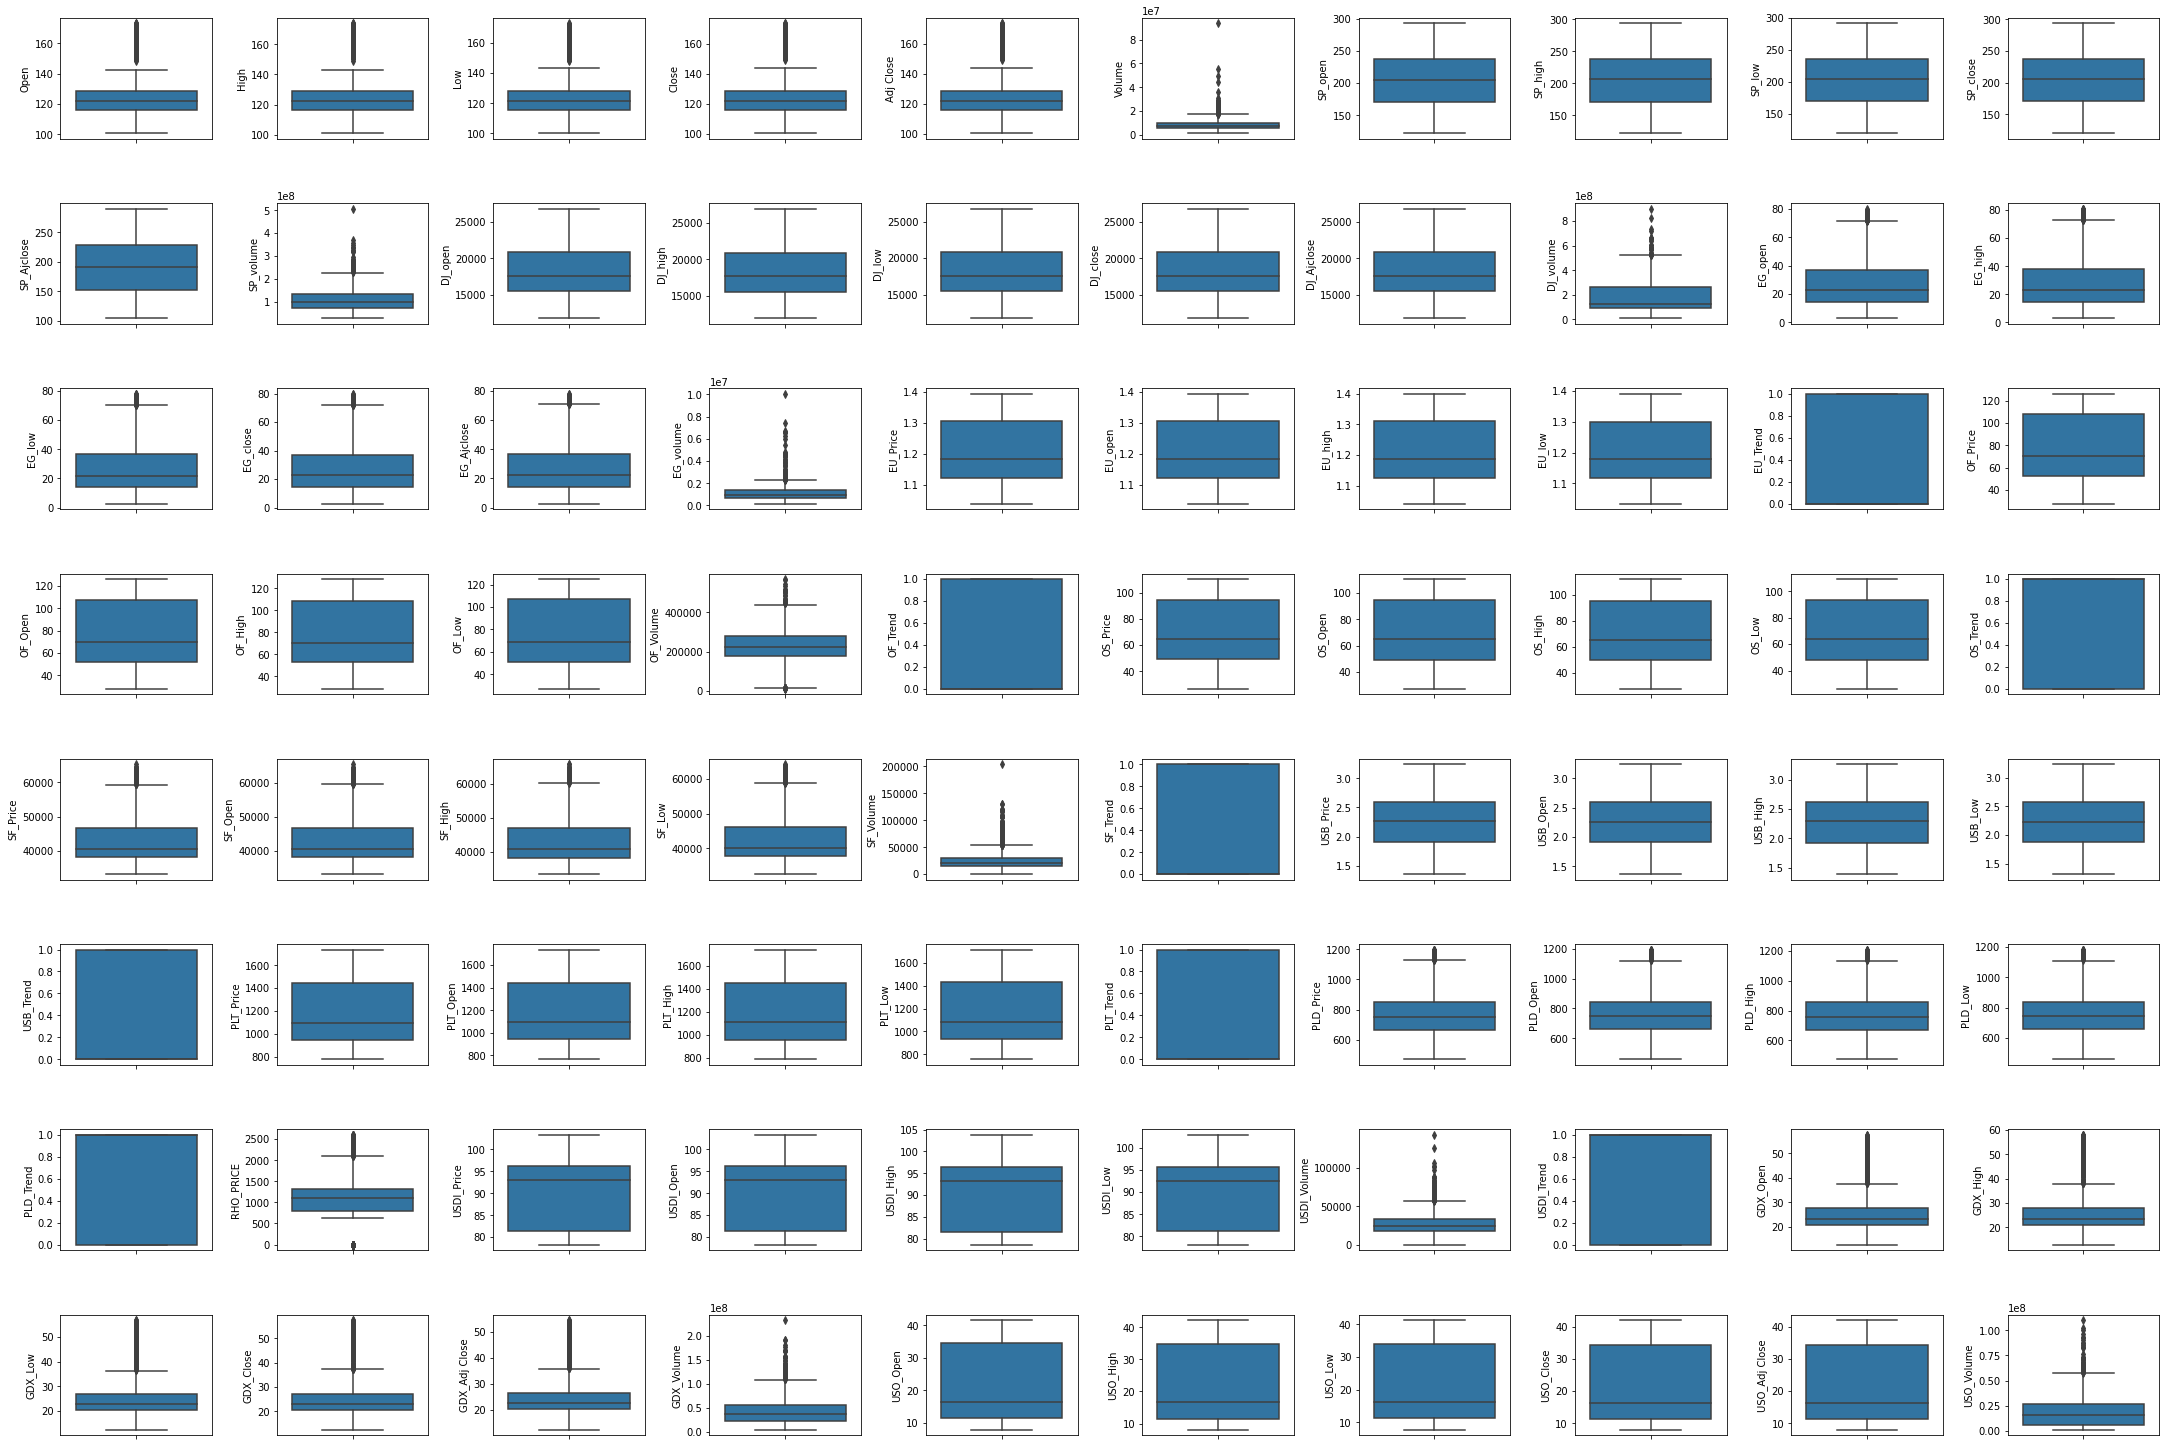

In [7]:
fig, axs = plt.subplots(ncols=10, nrows=8, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in gold_df.items(): #k = y-axis variable name 
    sns.boxplot(y=k, data=gold_df, ax=axs[index]) #plotting boxplot for getting knowledge of outliers
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

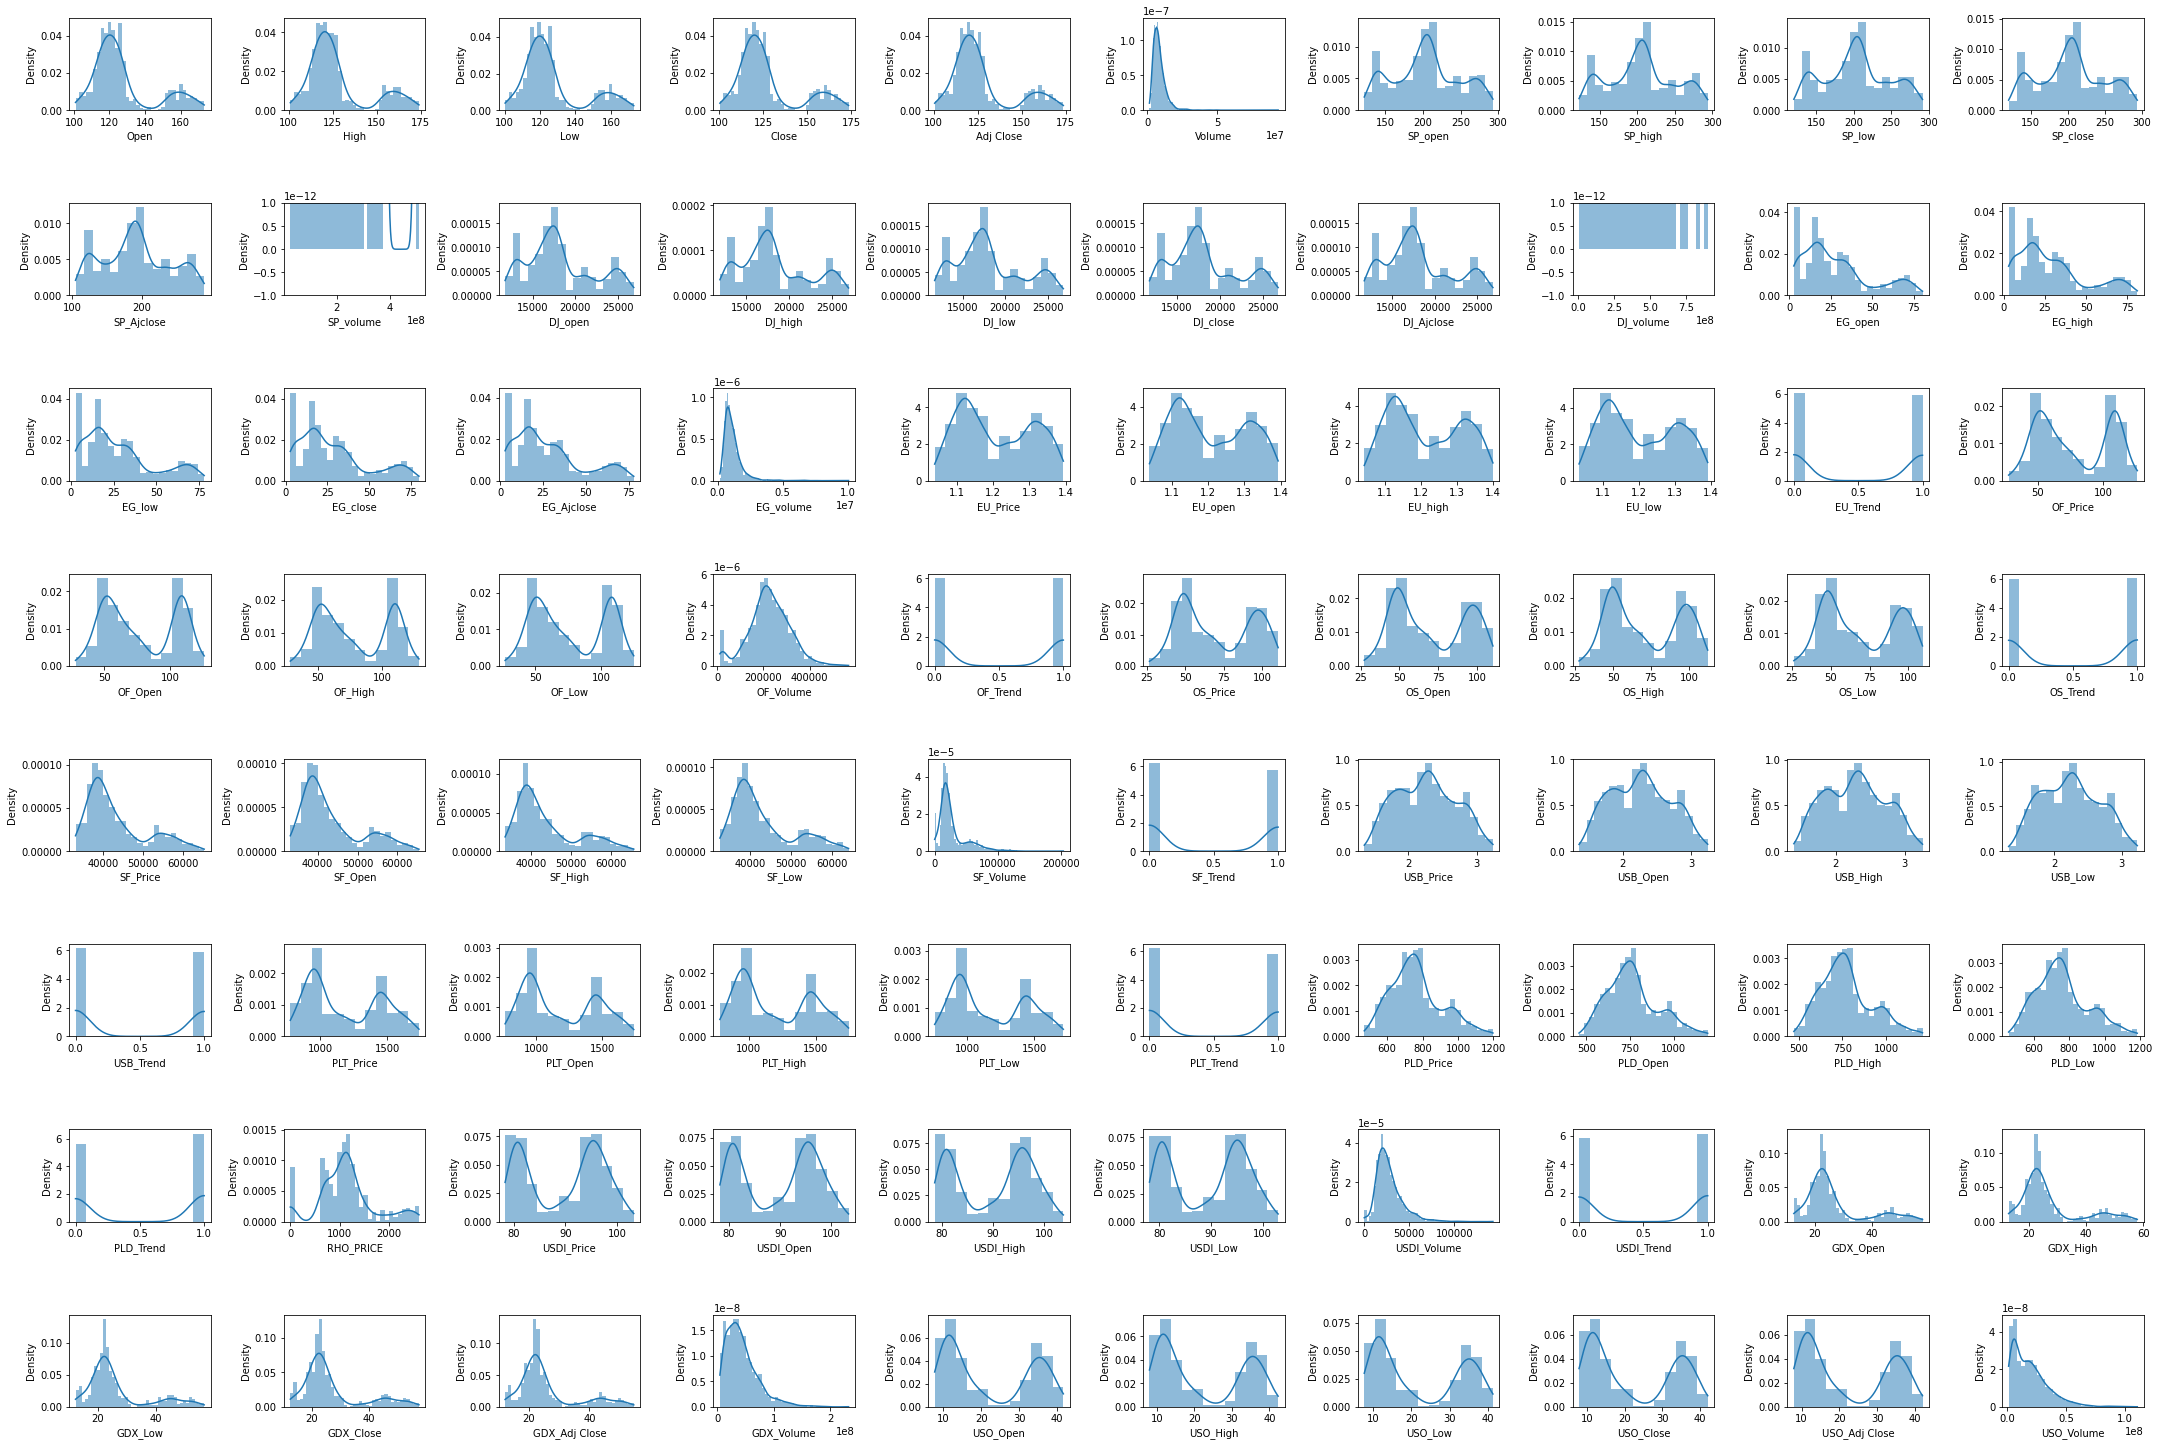

In [8]:
fig, axs = plt.subplots(ncols=10, nrows=8, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in gold_df.items(): #v = Pandas Series of data for a particular column
    sns.histplot(v, ax=axs[index], kde=True, linewidth=0, stat='density') #plotting histogram for getting frequency distribution
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
for k, v in gold_df.items(): #Outliers Percentage
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1 #Inter-Quartile Range (IQR) Method
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(gold_df)[0]
    print(f"{k} Outliers = {round(perc, 2)}")

Open Outliers = 18.98
High Outliers = 18.98
Low Outliers = 18.92
Close Outliers = 18.92
Adj Close Outliers = 18.92
Volume Outliers = 3.78
SP_open Outliers = 0.0
SP_high Outliers = 0.0
SP_low Outliers = 0.0
SP_close Outliers = 0.0
SP_Ajclose Outliers = 0.0
SP_volume Outliers = 2.44
DJ_open Outliers = 0.0
DJ_high Outliers = 0.0
DJ_low Outliers = 0.0
DJ_close Outliers = 0.0
DJ_Ajclose Outliers = 0.0
DJ_volume Outliers = 1.46
EG_open Outliers = 4.31
EG_high Outliers = 4.25
EG_low Outliers = 4.07
EG_close Outliers = 3.9
EG_Ajclose Outliers = 2.97
EG_volume Outliers = 5.06
EU_Price Outliers = 0.0
EU_open Outliers = 0.0
EU_high Outliers = 0.0
EU_low Outliers = 0.0
EU_Trend Outliers = 0.0
OF_Price Outliers = 0.0
OF_Open Outliers = 0.0
OF_High Outliers = 0.0
OF_Low Outliers = 0.0
OF_Volume Outliers = 2.39
OF_Trend Outliers = 0.0
OS_Price Outliers = 0.0
OS_Open Outliers = 0.0
OS_High Outliers = 0.0
OS_Low Outliers = 0.0
OS_Trend Outliers = 0.0
SF_Price Outliers = 4.25
SF_Open Outliers = 3.96
SF_

In [41]:
outliers = ['GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'RHO_PRICE', 'SF_Volume', 'Open', 'High', 'Low', 'Close', 'Adj Close']
gold_df2 = gold_df.copy(deep=True)

GDX_Open Outliers = 17.58\
GDX_High Outliers = 17.69\
GDX_Low Outliers = 18.22\
GDX_Close Outliers = 17.81\
GDX_Adj Close Outliers = 17.81\
RHO_PRICE Outliers = 16.82\
SF_Volume Outliers = 13.62\
Open Outliers = 18.98\
High Outliers = 18.98\
Low Outliers = 18.92\
Close Outliers = 18.92\
Adj Close Outliers = 18.92

In [47]:
def remove_outlier(df_in, col):
  for i in col:
    q1 = df_in[i].quantile(0.25)
    q3 = df_in[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[i] > fence_low) & (df_in[i] < fence_high)]
  return df_out

In [49]:
gold_df3 = remove_outlier(gold_df2, outliers)

In [50]:
gold_df3.shape

(1393, 80)

In [51]:
for k, v in gold_df3.items(): #Outliers Percentage
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1 #Inter-Quartile Range (IQR) Method
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(gold_df2)[0]
    print(f"{k} Outliers = {round(perc, 2)}")

Open Outliers = 0.47
High Outliers = 0.52
Low Outliers = 0.47
Close Outliers = 0.52
Adj Close Outliers = 0.52
Volume Outliers = 3.08
SP_open Outliers = 0.0
SP_high Outliers = 0.0
SP_low Outliers = 0.0
SP_close Outliers = 0.0
SP_Ajclose Outliers = 0.0
SP_volume Outliers = 3.78
DJ_open Outliers = 0.0
DJ_high Outliers = 0.0
DJ_low Outliers = 0.0
DJ_close Outliers = 0.0
DJ_Ajclose Outliers = 0.0
DJ_volume Outliers = 0.0
EG_open Outliers = 0.0
EG_high Outliers = 0.0
EG_low Outliers = 0.0
EG_close Outliers = 0.0
EG_Ajclose Outliers = 0.0
EG_volume Outliers = 4.02
EU_Price Outliers = 0.0
EU_open Outliers = 0.0
EU_high Outliers = 0.0
EU_low Outliers = 0.0
EU_Trend Outliers = 0.0
OF_Price Outliers = 0.0
OF_Open Outliers = 0.0
OF_High Outliers = 0.0
OF_Low Outliers = 0.0
OF_Volume Outliers = 2.04
OF_Trend Outliers = 0.0
OS_Price Outliers = 0.0
OS_Open Outliers = 0.0
OS_High Outliers = 0.0
OS_Low Outliers = 0.0
OS_Trend Outliers = 0.0
SF_Price Outliers = 1.75
SF_Open Outliers = 1.8
SF_High Outlie

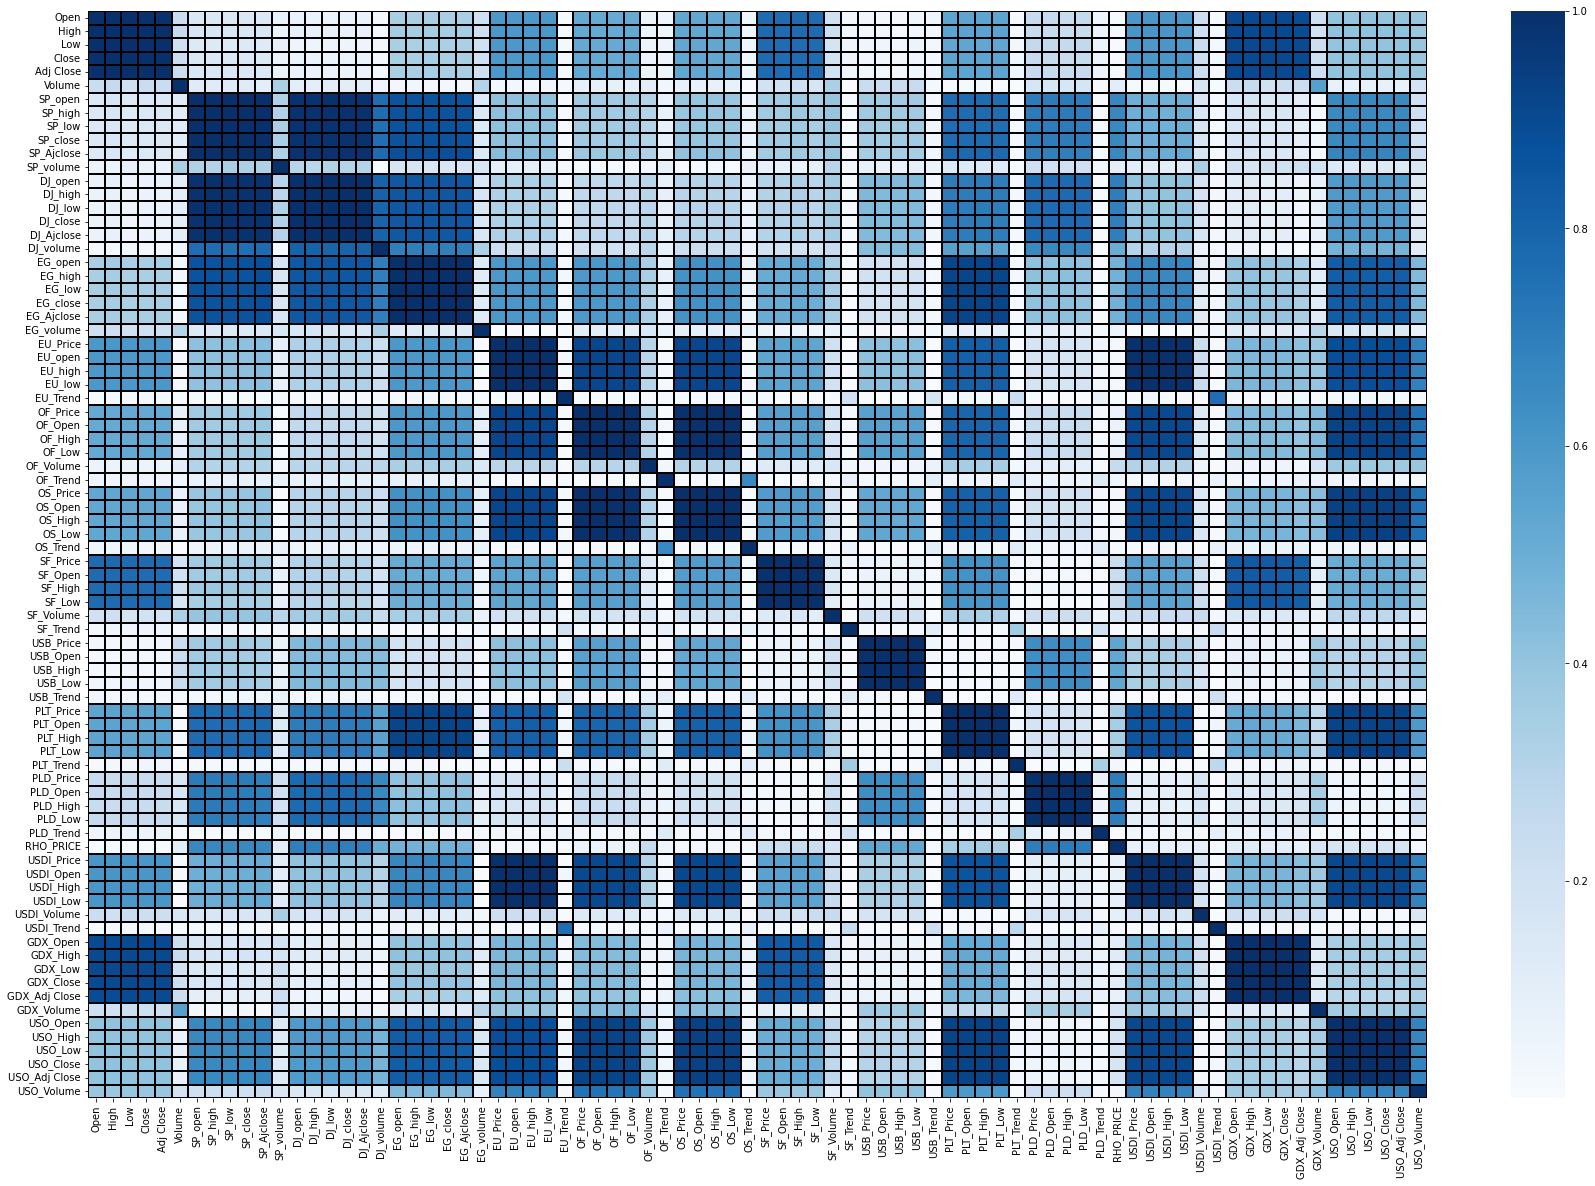

In [101]:
plt.figure(figsize=(30,20))
sns.heatmap(gold_df3.corr().abs(), annot=False, linecolor='black', linewidth=1, cmap='Blues') #correlation matrix 

In [56]:
#Everything
ct = make_column_transformer(
    (MinMaxScaler(), ['Open', 'High', 'Low', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']), # Normalize these columns
    )

In [57]:
X = gold_df3.drop(['Close', 'Adj Close'], axis=1)
Y = gold_df3['Adj Close']

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=53, test_size=0.2)

In [83]:
#Transform Training data
ct.fit(X_train)
#Transform training and test data with normalization(MinMaxScaler) and one hot encoding(OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [84]:
X_train_normal

array([[0.6903847 , 0.68540426, 0.70049007, ..., 0.03466318, 0.03466318,
        0.41198104],
       [0.28703067, 0.27841327, 0.26845533, ..., 0.3561151 , 0.3561151 ,
        0.25601884],
       [0.57453051, 0.56338225, 0.57049951, ..., 0.90941789, 0.90941789,
        0.        ],
       ...,
       [0.46345108, 0.47324677, 0.46711528, ..., 0.33518642, 0.33518642,
        0.69985906],
       [0.21138602, 0.20083146, 0.16076344, ..., 0.08306082, 0.08306082,
        0.56470811],
       [0.6514318 , 0.64196855, 0.63891545, ..., 0.0353172 , 0.0353172 ,
        0.4218216 ]])

In [116]:
#Set random seed so we can reproduce our results
tf.random.set_seed(66)

#Create model and sequentially go through data
gold_model = tf.keras.Sequential([
    #4 hidden layers with 3 having 100 neuron(Outputs)
    tf.keras.layers.Dense(100, activation='relu'), # Activation functions help our network decide what is important data.
    tf.keras.layers.Dense(100, activation='relu'), # Without activation functions our system is just a simple regression model
    tf.keras.layers.Dense(100, activation='relu'), # relu (Rectified Linear Unit) is a function that is computationally efficient
    tf.keras.layers.Dense(1) # Depending on the error value the weights are updated
])

#Compile the model(Calc errors, optimizeand evaluate)
#Mean Absolute Error : Finds the average of the errors between predictions and 
#observed data (How incorrect are our predictions)
# Stochastic Gradient Descent : Optimizes our guesses by smoothing the predictions 
# to the observed data
# Metrics test the accuracy of the model
gold_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                 metrics=['mae'])

# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
fit_data = gold_model.fit(X_train_normal, Y_train, epochs=100, verbose=1) #Increasing Epochs Decreases Loss

Epoch 1/100
35/35 [==============================] - 1s 3ms/step - loss: 33.6048 - mae: 33.6048
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 7.3227 - mae: 7.3227
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 5.9239 - mae: 5.9239
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 5.1091 - mae: 5.1091
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 5.7174 - mae: 5.7174
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 3.2195 - mae: 3.2195
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 3.2218 - mae: 3.2218
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 4.9062 - mae: 4.9062
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 4.9960 - mae: 4.9960
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 3.4561 - mae: 3.4561
Epoch 11/100
35/35 [==============================] - 0s 

In [76]:
#Evaluate Gold model
gold_model_loss, gold_model_mae = gold_model.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.9879 - mae: 0.9879


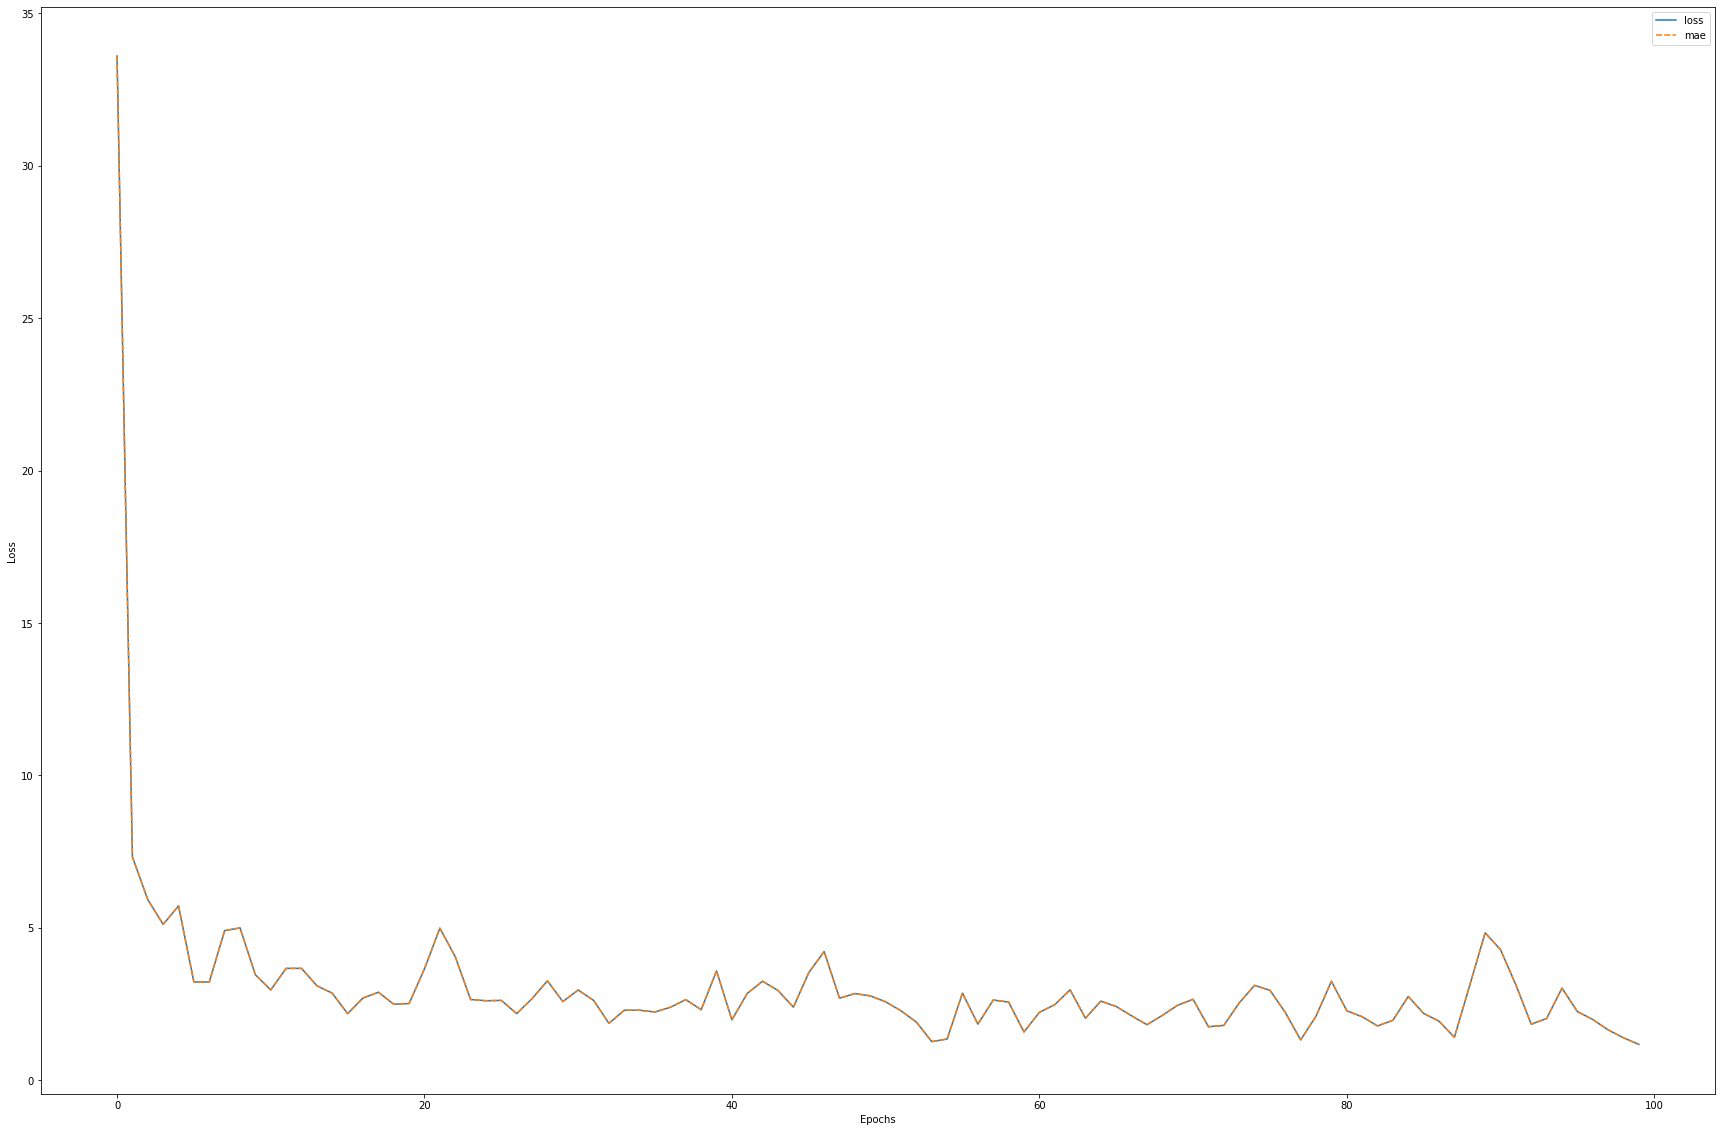

In [77]:
plt.figure(figsize=(30, 20))
plt.xlabel("Epochs")
plt.ylabel("Loss")
sns.lineplot(data=fit_data.history)

In [78]:
# Show the layers the output shape and the number of parameters for each layer
# Trainable Params : Model updates these as it trains
# Non-trainable Params : Not updated during training (Outside Patterns from other Models)
gold_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               7900      
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 28,201
Trainable params: 28,201
Non-trainable params: 0
_________________________________________________________________


In [110]:
best_model_predict = gold_model.predict(X_test_normal)
results_df = pd.DataFrame()
results_df['Predictions'] = list(best_model_predict.flatten())
results_df['Actual'] = list(Y_test)
display(results_df)

9/9 [==============================] - 0s 3ms/step


,Predictions,Actual
0,118.850624,118.089996
1,131.593079,130.270004
2,131.412628,131.750000
3,108.514587,107.110001
4,118.807343,118.220001
...,...,...
274,108.353958,107.339996
275,120.671394,119.730003
276,113.397614,111.750000
277,122.802559,120.540001


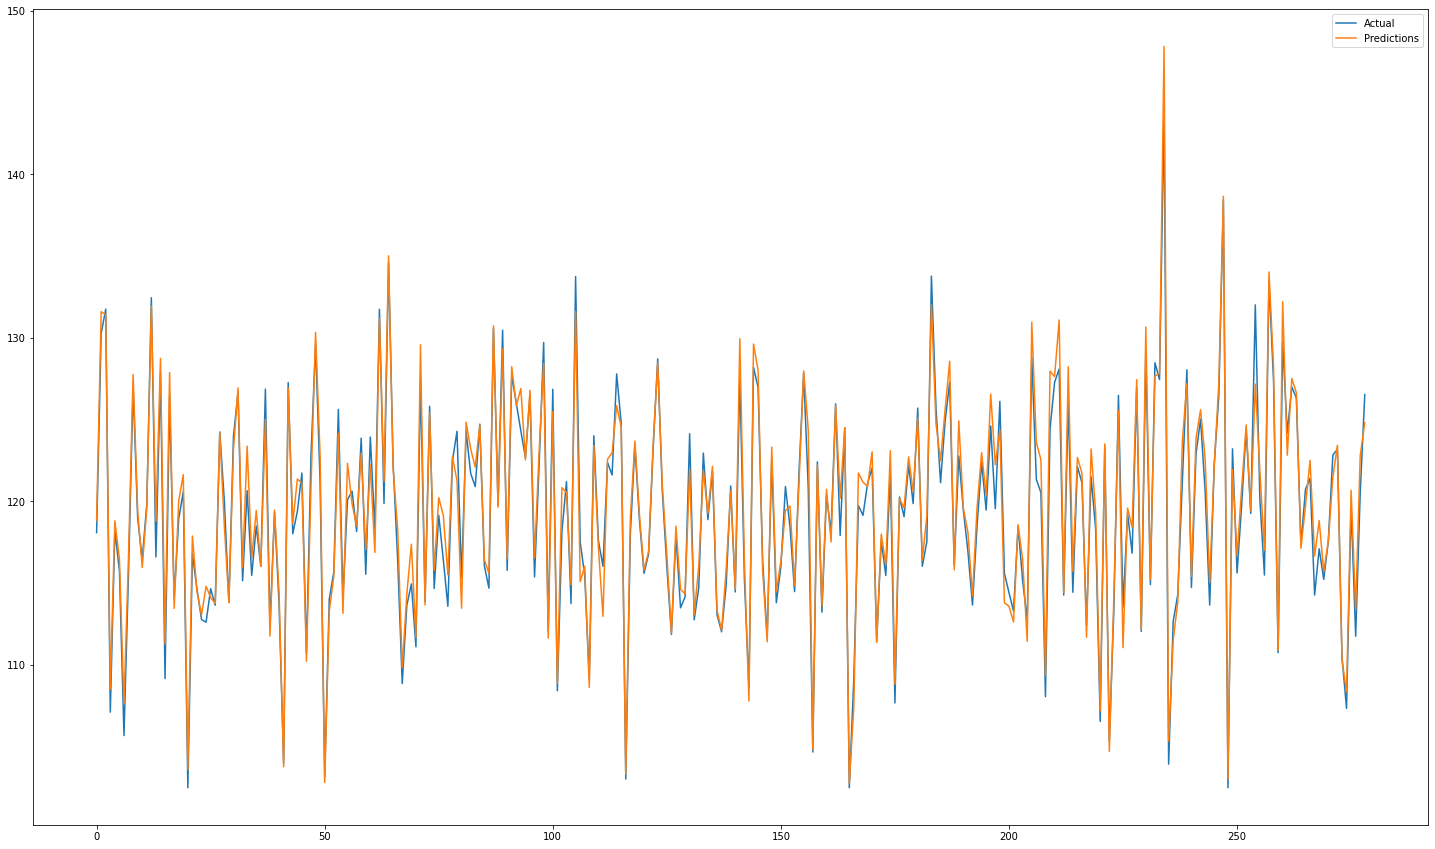

In [120]:
results_df.plot(y=["Actual", "Predictions"],
        kind="line", figsize=(25,15))
plt.show()

In [117]:
gold_model.save("Gold_Price_Prediction")